In [1]:
import pandas as pd

In [ ]:
df_final=pd.read_csv('df_decada.csv')

In [3]:
df_final.head()

,Acousticness,Album,Album_type,Artist,Danceability,Date,Duration_ms,Energy,Instrumentalness,Key,...,Views,official_video,Year,Decada,Genero,Duration_min,Genero_filtrado,Cluster,rock,reggaeton
0,0.24000,c@ra++ere s?ec!@le,album,thasup,0.765,2022-09-30,206495.0,0.726,0.0000,7.0,...,5914198.0,1.0,2022,2020,"italian hip hop, italian pop, trap italiana",3.441583,[],1,0,0
1,0.09140,#1 (Colby O'Donis Remix),single,Colby O'Donis,0.762,2009-06-17,137528.0,0.864,0.0000,7.0,...,50109737.0,1.0,2009,2000,NaN,2.292133,[''],1,0,0
2,0.91100,Selected Ambient Works Volume II,album,Aphex Twin,0.167,1994-03-07,464293.0,0.071,0.8550,6.0,...,18316658.0,0.0,1994,1990,"ambient, braindance, electronica, intelligent ...",7.738217,[],1,0,0
3,0.00199,Crash,album,Dave Matthews Band,0.577,1996-04-30,399800.0,0.726,0.0386,4.0,...,4160936.0,1.0,1996,1990,"jam band, neo mellow, pop rock",6.663333,"['neo mellow', 'pop rock']",1,0,0
4,0.32700,#Ysya2020 Vol. 5 - Silbando,single,YSY A,0.936,2020-10-18,119438.0,0.659,0.0000,5.0,...,1866183.0,1.0,2020,2020,"argentine hip hop, trap argentino",1.990633,[],1,0,0


In [4]:
df_final['Stream'].describe()

count    1.686600e+04
mean     1.362465e+08
std      2.433885e+08
min      6.574000e+03
25%      1.748466e+07
50%      4.993142e+07
75%      1.391041e+08
max      3.386520e+09
Name: Stream, dtype: float64

In [5]:
df_decada=df_final[df_final['Decada']==2010]

In [6]:
df_decada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5463 entries, 5 to 16865
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Acousticness      5463 non-null   float64
 1   Album             5463 non-null   object 
 2   Album_type        5463 non-null   object 
 3   Artist            5463 non-null   object 
 4   Danceability      5463 non-null   float64
 5   Date              5463 non-null   object 
 6   Duration_ms       5463 non-null   float64
 7   Energy            5463 non-null   float64
 8   Instrumentalness  5463 non-null   float64
 9   Key               5463 non-null   float64
 10  Licensed          5463 non-null   float64
 11  Likes             5463 non-null   float64
 12  Liveness          5463 non-null   float64
 13  Loudness          5463 non-null   float64
 14  Speechiness       5463 non-null   float64
 15  Stream            5463 non-null   float64
 16  Tempo             5463 non-null   float64
 17 

## Cálculo de quartiles del Stream

In [7]:
import pandas as pd

# Calcular los cuartiles
q1 = df_decada['Stream'].quantile(0.25)  # Primer cuartil (Q1)
q2 = df_decada['Stream'].quantile(0.50)  # Segundo cuartil (Q2) - Mediana
q3 = df_decada['Stream'].quantile(0.75)  # Tercer cuartil (Q3)

print(f"Q1: {q1}, Q2 (Mediana): {q2}, Q3: {q3}")


Q1: 31006202.5, Q2 (Mediana): 82406656.0, Q3: 225341153.0


Voy a dividir en dos categorias de stream. Una moderadamente extoso Stream menor a q3 y otra exitoso mayor a q3

In [8]:
# Definir los límites manualmente
bins = [0, q3, df_decada['Stream'].max()]
labels = [0,1]

df_decada['Categoria'] = pd.cut(df_decada['Stream'], bins=bins, labels=labels, include_lowest=True)
# Ver la distribución de las categorías
print(df_decada['Categoria'].value_counts())

Categoria
0    4097
1    1366
Name: count, dtype: int64


/tmp/ipykernel_136883/3415324099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decada['Categoria'] = pd.cut(df_decada['Stream'], bins=bins, labels=labels, include_lowest=True)


La categorías estan algo desbalanceadas, para entrenar el modelo se va acotar el df de prueba. Solo se van a usar 4217 valores de la categoría cero

In [9]:
count_cat1=df_decada['Categoria'].value_counts()[1]

In [10]:
# Filtrar las categorías
categoria_0 = df_decada[df_decada['Categoria'] == 0]
categoria_1 = df_decada[df_decada['Categoria'] == 1]

# Muestrear 175 registros aleatorios de la categoría 0
categoria_0_sample = categoria_0.sample(n=count_cat1, random_state=42)

# Combinar los 175 registros de cada categoría
df_balanceado = pd.concat([categoria_0_sample, categoria_1])

# Barajar las filas (opcional, para mezclar las categorías)
df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar la distribución de las categorías
print(df_balanceado['Categoria'].value_counts())

Categoria
0    1366
1    1366
Name: count, dtype: int64


In [11]:
X=df_balanceado[['Acousticness','Danceability', 'Duration_min', 'Energy',
       'Instrumentalness', 'Key', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence',
        ]]

In [12]:
y=df_balanceado['Categoria']

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
# 🔹 2. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from lazypredict.Supervised import LazyClassifier

In [15]:
lazy_clf= LazyClassifier(verbose=0,
					ignore_warnings=False,
					custom_metric=None)

# fitting data in LazyClassifier
models, predictions = lazy_clf.fit(X_train, X_test,
							y_train, y_test)
models

 22%|██▏       | 7/32 [00:00<00:01, 20.65it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X).


 31%|███▏      | 10/32 [00:00<00:01, 15.64it/s]

FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'


 84%|████████▍ | 27/32 [00:02<00:00, 11.57it/s]

SelfTrainingClassifier model failed to execute
You must pass an estimator to SelfTrainingClassifier. Use `estimator`.
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV model failed to execute
TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'


100%|██████████| 32/32 [00:02<00:00, 11.44it/s]

XGBClassifier model failed to execute
'super' object has no attribute '__sklearn_tags__'
[LightGBM] [Info] Number of positive: 1105, number of negative: 1080
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2563
[LightGBM] [Info] Number of data points in the train set: 2185, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505721 -> initscore=0.022884
[LightGBM] [Info] Start training from score 0.022884


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.62,0.62,0.62,0.62,0.24
LGBMClassifier,0.62,0.62,0.62,0.62,0.08
RandomForestClassifier,0.62,0.62,0.62,0.62,0.51
AdaBoostClassifier,0.62,0.62,0.62,0.62,0.18
SVC,0.61,0.62,0.62,0.61,0.13
NuSVC,0.61,0.62,0.62,0.61,0.28
SGDClassifier,0.61,0.61,0.61,0.61,0.02
QuadraticDiscriminantAnalysis,0.60,0.61,0.61,0.57,0.01
BaggingClassifier,0.61,0.61,0.61,0.61,0.15


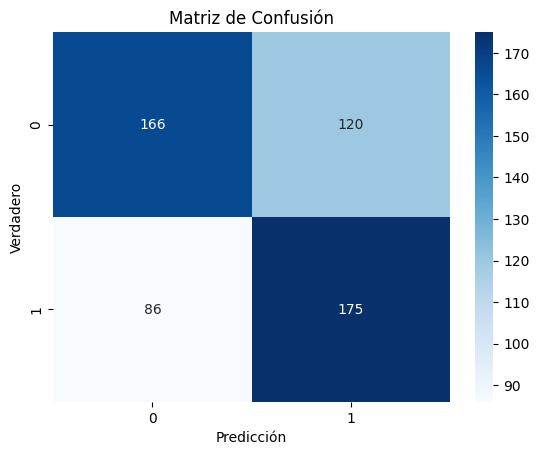

In [18]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()


In [17]:
from xgboost import XGBClassifier

# Entrenar un modelo XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred_xgb = xgb.predict(X_test)

print("Reporte de Clasificación con XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Reporte de Clasificación con XGBoost:
              precision    recall  f1-score   support

           0       0.64      0.61      0.63       286
           1       0.59      0.62      0.61       261

    accuracy                           0.62       547
   macro avg       0.62      0.62      0.62       547
weighted avg       0.62      0.62      0.62       547



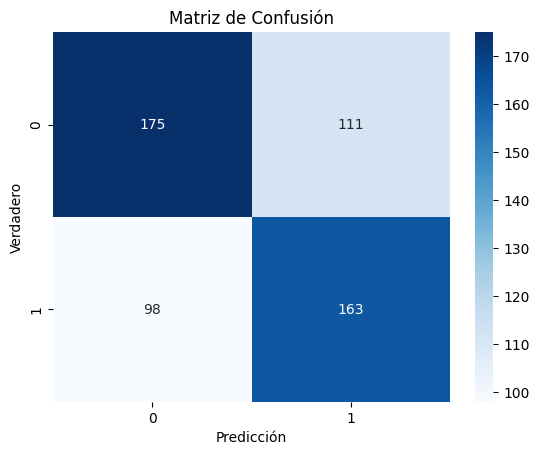

In [19]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definir el espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [3, 5, 10, None],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras en una hoja
    'bootstrap': [True, False]  # Si se usa bootstrap
}

# Crear el modelo base
rf = RandomForestClassifier(random_state=42)

# Configurar el GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='f1_weighted',  # Métrica de evaluación
    cv=5,  # Validación cruzada con 5 particiones
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1  # Mostrar progreso
)

# Ajustar el modelo con los datos de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores parámetros:", grid_search_rf.best_params_)

# Evaluar el modelo con el conjunto de prueba
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Reporte de clasificación
print("Reporte de Clasificación con Random Forest:")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores parámetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Reporte de Clasificación con Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       286
           1       0.62      0.67      0.64       261

    accuracy                           0.65       547
   macro avg       0.65      0.65      0.65       547
weighted avg       0.65      0.65      0.65       547



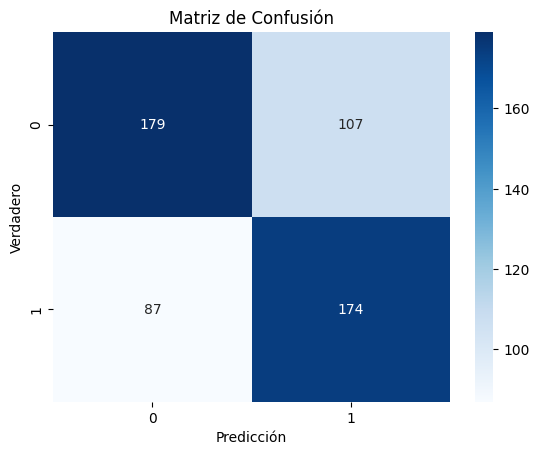

In [21]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Crear una métrica personalizada para maximizar el recall de la Clase 1
recall_scorer = make_scorer(recall_score, pos_label=1)

# Definir el espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [5, 10, 15, None],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'],  # Número de características consideradas en cada división
    'class_weight': [None, 'balanced']  # Ponderar automáticamente las clases
}

# Crear el modelo base
rf = RandomForestClassifier(random_state=42)

# Configurar el GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring=recall_scorer,  # Optimizar el Recall para la Clase 1
    cv=5,  # Validación cruzada con 5 particiones
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1  # Mostrar progreso
)

# Ajustar el modelo con los datos de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores parámetros:", grid_search_rf.best_params_)

# Evaluar el modelo con el conjunto de prueba
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Generar un reporte de clasificación
from sklearn.metrics import classification_report
print("Reporte de Clasificación con el Mejor Random Forest:")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Mejores parámetros: {'class_weight': None, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Reporte de Clasificación con el Mejor Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       286
           1       0.60      0.68      0.64       261

    accuracy                           0.63       547
   macro avg       0.63      0.63      0.63       547
weighted avg       0.64      0.63      0.63       547



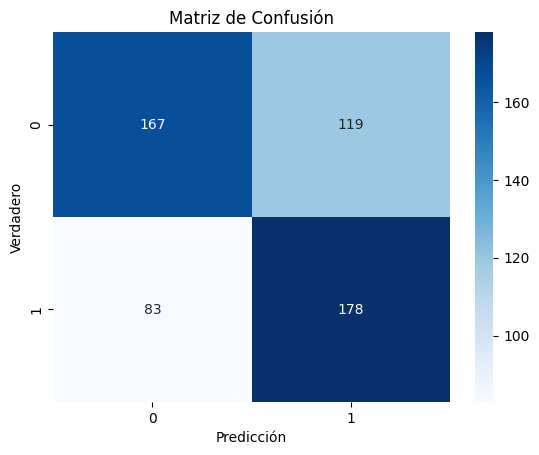

In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

Reporte de Clasificación para Random Forest Optimizado:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       286
           1       0.60      0.68      0.64       261

    accuracy                           0.63       547
   macro avg       0.63      0.63      0.63       547
weighted avg       0.64      0.63      0.63       547



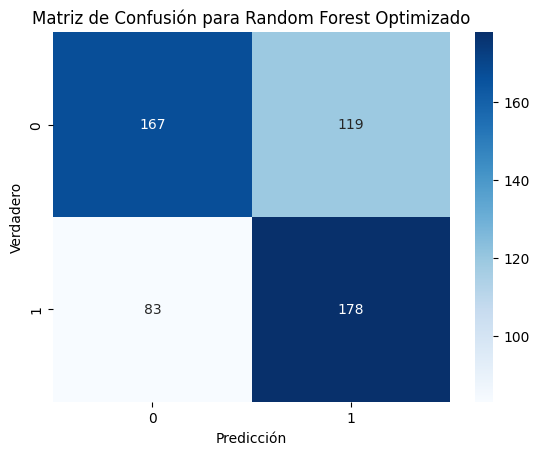

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el modelo con los mejores parámetros
rf_optimized = RandomForestClassifier(
    class_weight=None, 
    max_depth=5, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=10, 
    n_estimators=200, 
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
rf_optimized.fit(X_train, y_train)

# Predecir las clases en el conjunto de prueba
y_pred = rf_optimized.predict(X_test)

# Reporte de clasificación
print("Reporte de Clasificación para Random Forest Optimizado:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión para Random Forest Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()


In [28]:
decadas=[1970,1980,1990,2000,2010,2020]

Reporte de Clasificación para Random Forest Optimizado década 1970:
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        29
           1       0.49      0.55      0.52        31

    accuracy                           0.47        60
   macro avg       0.46      0.46      0.46        60
weighted avg       0.46      0.47      0.46        60



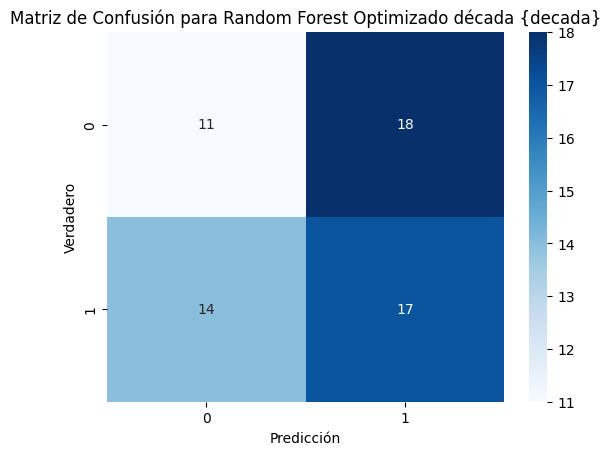

Reporte de Clasificación para Random Forest Optimizado década 1980:
              precision    recall  f1-score   support

           0       0.69      0.39      0.50        51
           1       0.47      0.75      0.57        36

    accuracy                           0.54        87
   macro avg       0.58      0.57      0.54        87
weighted avg       0.60      0.54      0.53        87



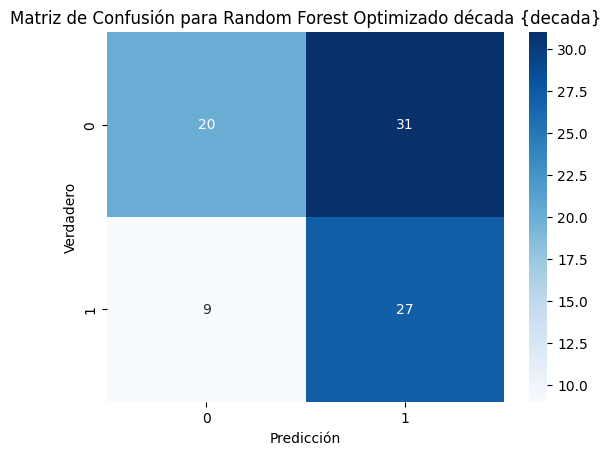

Reporte de Clasificación para Random Forest Optimizado década 1990:
              precision    recall  f1-score   support

           0       0.68      0.56      0.62        80
           1       0.58      0.70      0.64        70

    accuracy                           0.63       150
   macro avg       0.63      0.63      0.63       150
weighted avg       0.64      0.63      0.63       150



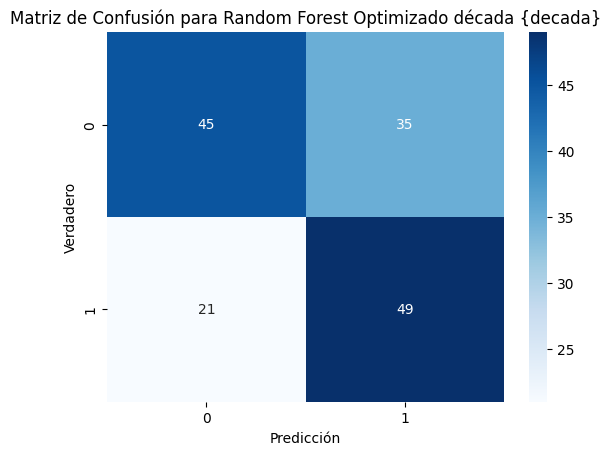

Reporte de Clasificación para Random Forest Optimizado década 2000:
              precision    recall  f1-score   support

           0       0.58      0.57      0.57       122
           1       0.59      0.60      0.60       126

    accuracy                           0.58       248
   macro avg       0.58      0.58      0.58       248
weighted avg       0.58      0.58      0.58       248



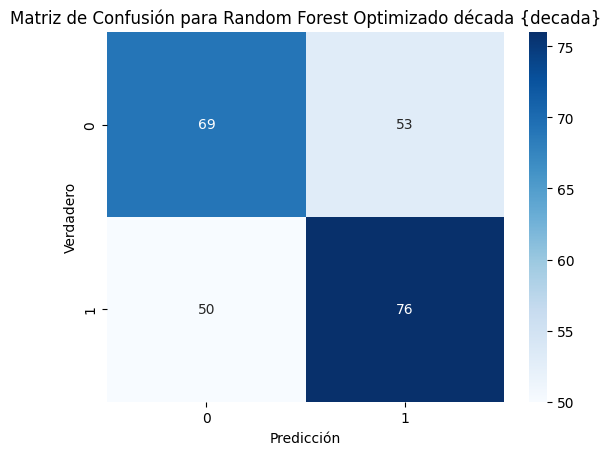

Reporte de Clasificación para Random Forest Optimizado década 2010:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       286
           1       0.60      0.68      0.64       261

    accuracy                           0.63       547
   macro avg       0.63      0.63      0.63       547
weighted avg       0.64      0.63      0.63       547



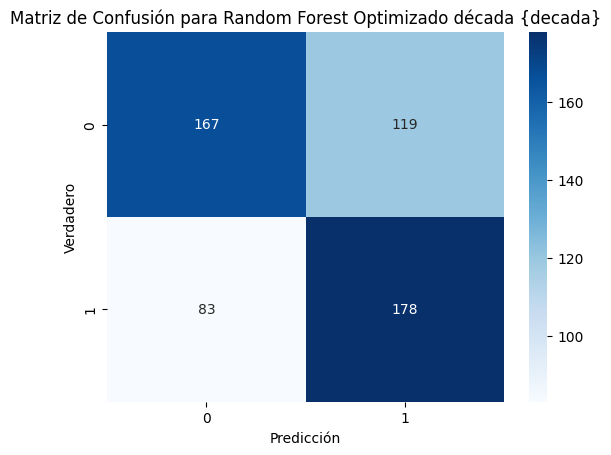

Reporte de Clasificación para Random Forest Optimizado década 2020:
              precision    recall  f1-score   support

           0       0.63      0.42      0.50       285
           1       0.56      0.75      0.64       282

    accuracy                           0.58       567
   macro avg       0.59      0.58      0.57       567
weighted avg       0.59      0.58      0.57       567



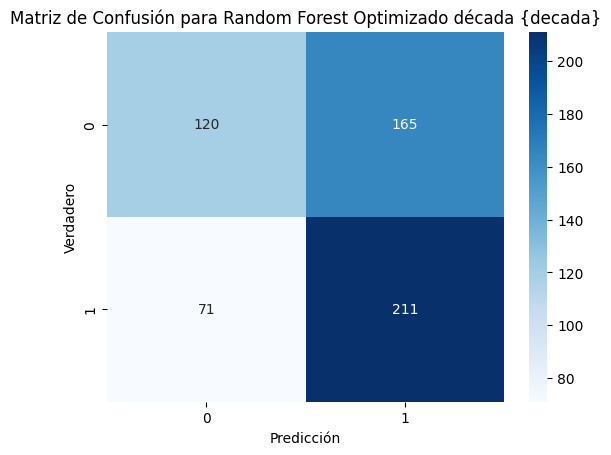

In [30]:
for decada in decadas:

        df_decada=df_final[df_final['Decada']==decada]
        #df_decada.info()
        ## Cálculo de quartiles del Stream
        

        # Calcular los cuartiles
        q1 = df_decada['Stream'].quantile(0.25)  # Primer cuartil (Q1)
        q2 = df_decada['Stream'].quantile(0.50)  # Segundo cuartil (Q2) - Mediana
        q3 = df_decada['Stream'].quantile(0.75)  # Tercer cuartil (Q3)

        #print(f"Q1: {q1}, Q2 (Mediana): {q2}, Q3: {q3}")

        #Voy a dividir en dos categorias de stream. Una moderadamente extoso Stream menor a q3 y otra exitoso mayor a q3
        # Definir los límites manualmente
        bins = [0, q3, df_decada['Stream'].max()]
        labels = [0,1]

        df_decada['Categoria'] = pd.cut(df_decada['Stream'], bins=bins, labels=labels, include_lowest=True)
        # Ver la distribución de las categorías
        
        
        count_cat1=df_decada['Categoria'].value_counts()[1]
        # Filtrar las categorías
        categoria_0 = df_decada[df_decada['Categoria'] == 0]
        categoria_1 = df_decada[df_decada['Categoria'] == 1]

        
        categoria_0_sample = categoria_0.sample(n=count_cat1, random_state=42)

        
        df_balanceado = pd.concat([categoria_0_sample, categoria_1])

        # Barajar las filas (opcional, para mezclar las categorías)
        df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

        # Verificar la distribución de las categorías
        #print(f'valores por decada {decada}')
        #print(df_balanceado['Categoria'].value_counts())
        
        X=df_balanceado[['Acousticness','Danceability', 'Duration_min', 'Energy',
        'Instrumentalness', 'Key', 'Liveness', 'Loudness',
        'Speechiness', 'Tempo', 'Valence',
                ]]
        y=df_balanceado['Categoria']
        from sklearn.model_selection import train_test_split, cross_val_score
        # 🔹 2. Dividir los datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        
        
        

        # Crear el modelo con los mejores parámetros
        rf_optimized = RandomForestClassifier(
        class_weight=None, 
        max_depth=5, 
        max_features='sqrt', 
        min_samples_leaf=1, 
        min_samples_split=10, 
        n_estimators=200, 
        random_state=42
        )

        # Entrenar el modelo con los datos de entrenamiento
        rf_optimized.fit(X_train, y_train)

        # Predecir las clases en el conjunto de prueba
        y_pred = rf_optimized.predict(X_test)

        # Reporte de clasificación
        print(f"Reporte de Clasificación para Random Forest Optimizado década {decada}:")
        print(classification_report(y_test, y_pred))

        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title("Matriz de Confusión para Random Forest Optimizado década {decada}")
        plt.xlabel("Predicción")
        plt.ylabel("Verdadero")
        plt.show()
        